# Image Classification using GoogleNet Inception v1
### Prerequisites
- OpenCV
- Basic Understanding of DNN
- Data Structures 

As the heading suggests that this is image classification through the GoogleNet deep neural network that is a pre-trained neural network being used for the classification of images. 

### Results
- you would be able to classify images in real time (videos)
- thorough understanding of image classification and using a pre-trained model 

# ImageNet
As we see here in the ```rows``` variable that we have imported a huge dataset of all the classes of images and those images have mutiple names attaced to them, this dataset is extracted using imageNet, but we actually don't need so much of the data here, and only the data of first index of our class, hence from here on we have to clean this dataset.

In [3]:
import cv2
import numpy as np
import time

rows = open('synset_words.txt').read().strip().split('\n') #the 'read()' func literally reads the dataset 
print(rows[0:5])                                           #the 'strip()' func deletes all the spaces in-between
print(len(rows))                                           # the 'split()' func used to add some seperation

['n01440764 tench, Tinca tinca', 'n01443537 goldfish, Carassius auratus', 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361 tiger shark, Galeocerdo cuvieri', 'n01494475 hammerhead, hammerhead shark']
1000


## Extraction from Dataset
Now from the classes of different images we have extracted the first indexed value as shown in the output

In [4]:
classes = [r[r.find(' ')+1:].split(",")[0] for r in rows]  # we loop through the rows and split each class taking out only the first indexed values
print(classes[0:5])

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


## Importing the GoogleNet
```weights``` and ```arch``` are the variables that have our CaffModel and the weight architecture loaded
from here we initialize a var ```net``` which is basically our neural net.
### what is a blob?  
```blob```
The former process is known as BLOB extraction and the latter as BLOB classification. BLOB stands for Binary Large OBject and refers to a group of connected pixels in a binary image. The term “Large” indicates that only objects of a certain size are of interest and that “small” binary objects are usually noise.


From here, we make our predictions by sending our blob data by traversing it in the ```net.forward()``` .

In [10]:
weights = 'bvlc_googlenet.caffemodel'             
arch = 'bvlc_googlenet.prototxt'
net = cv2.dnn.readNetFromCaffe(arch, weights)
image = cv2.imread('eagle.png')
blob = cv2.dnn.blobFromImage(image, 1, (244,244), (104, 117, 123)) #the extra args here are done due to the need of our googleNet

net.setInput(blob)            #If you see the picture of googleNet inception v1 you'd see an input point, this is what it basically is in writing it programmatically 
start = time.time()
preds = net.forward()         #Traversing the blob in net to make some predictions
end = time.time()
print("classification took {:.3} seconds".format(end- start))

classification took 0.0722 seconds


## This is our Image

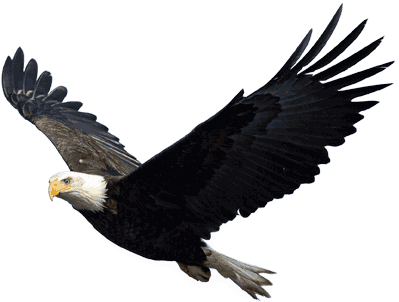

In [12]:
from PIL import Image
pic = Image.open('eagle.png')
pic

## Highest Probability Prediction
In the given result we have taken out the 5 highest probability prediction that were done by our net, the array ```[22 21 23 93 80]``` shows us the args[index] of those other objects/living things that it has predicted where the data is in descending order, hence making the first index value the highest probability prediction that is Bald Eagle.

In [6]:
n = 5
print(len(preds[0]))
np.argsort(preds[0])       #sorting data w.r.t args
np.argsort(preds[0])[::-1]   # sorting it in descending order
allindexes = np.argsort(preds[0])[::-1]    # saving the same value in the allindexes
idxs = allindexes[:n]          # idxs is the var where the first 5 values are saved, we trim our array here
print(idxs)
print(classes[idxs[0]])

1000
[22 21 23 93 80]
bald eagle


## LOOP
We do a loop here on our 5 predicted values and print the idx[0] highest probablity values on our image 

In [7]:
for(i,idx) in enumerate(idxs):
    if i==0:
        text = 'Label: {}, {:.2f}%'.format(classes[idx], preds[0][idx]*100)
        cv2.putText(image, text, (6, 27), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 55, 255), 2) #Writing text on image and choosing the color on our own
        
    print("label: {} : {}, probability: {:.5}".format(i+1, classes[idx], preds[0][idx]))
    
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

label: 1 : bald eagle, probability: 0.99163
label: 2 : kite, probability: 0.0078082
label: 3 : vulture, probability: 0.00048208
label: 4 : hornbill, probability: 2.0498e-05
label: 5 : black grouse, probability: 1.8274e-05


# Internship Task
Here I put a while loop to keep the nural network running and to keep it predicting values in real time, it is a mixture of already mentioned program

In [13]:
usecamera = True
import cv2
import numpy as np
import time 

'''This is the part of code where we initialize our dataset and also our GoogleNet'''
rows = open('synset_words.txt').read().strip().split('\n')   
classes = [r[r.find(' ')+1:].split(",")[0] for r in rows]
weights = 'bvlc_googlenet.caffemodel'
arch = 'bvlc_googlenet.prototxt'
net = cv2.dnn.readNetFromCaffe(arch, weights)
cap = cv2.VideoCapture(0)

'''This is the part of code where we keep the Video running and the blob inside so that it can be re
initialized again and again everytime a new frame comes in'''
while True:
    ret, frame = cap.read()
    image1 = cv2.flip(frame, 1)
    
    blob = cv2.dnn.blobFromImage(image1, 1, (244,244), (104, 117, 123))
    net.setInput(blob)
    preds = net.forward()

    np.argsort(preds[0])
    np.argsort(preds[0])[::-1]
    allindexes = np.argsort(preds[0])[::-1]
    idx = allindexes[:1]

    targetclass = classes[idx[0]]
    confidence = preds[0][idx][0]*100

    text = 'Label: {}, {:.2f}%'.format(targetclass, confidence)
    cv2.putText(image1, text, (6, 27), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 55, 255), 2)
    #print(text)
    cv2.imshow('me', image1)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

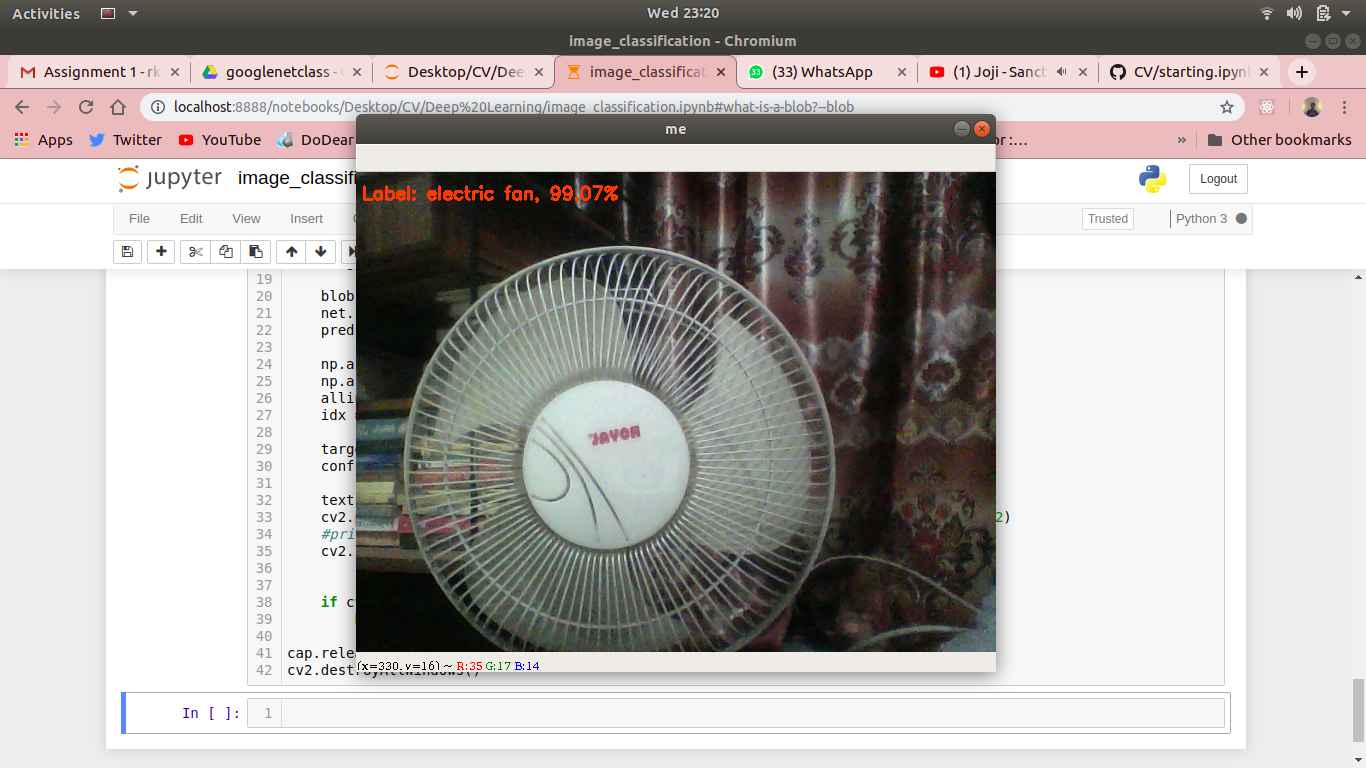

In [16]:
myResult = Image.open('myRes.png')
myResult